In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

In [2]:
class LogNormalDistribution:
    def __init__(self, mean, sigma):
        self.mean = mean
        self.sigma = sigma

    def pdf(self, x):
        """Custom implementation of the PDF of Log-Normal distribution."""
        prefactor = 1 / (x * self.sigma * np.sqrt(2 * np.pi))
        exponent = - (np.log(x) - self.mean) ** 2 / (2 * self.sigma ** 2)
        return prefactor * np.exp(exponent)

    def cdf(self, x):
        """Calculate the CDF using the PDF."""
        return np.array([self._cdf_single(val) for val in x])

    def _cdf_single(self, x_val):
        """Numerical integration of the PDF to get CDF for a single value."""
        x_range = np.linspace(0.01, x_val, 1000)  # Avoid log(0) with 0.01
        pdf_vals = self.pdf(x_range)
        return np.trapz(pdf_vals, x_range)  # Numerical integration to get CDF


def plot_pdf(x_values, pdf1, pdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf1, label=label1, color='blue')
    plt.plot(x_values, pdf2, label=label2, color='red')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_cdf(x_values, cdf1, cdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, cdf1, label=label1, color='blue')
    plt.plot(x_values, cdf2, label=label2, color='red')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_comparison(x_values, pdf_scipy, pdf_custom, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf_scipy, label=label1, color='blue')
    plt.plot(x_values, pdf_custom, label=label2, color='orange')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Parameters for two log-normal distributions
mean1, sigma1 = 0, 0.5
mean2, sigma2 = 0, 1.0

# Generate x values for which we calculate the PDF and CDF
x_values = np.linspace(0.01, 5, 1000)

# Calculate PDF and CDF using scipy
pdf_lognorm_1_scipy = lognorm.pdf(x_values, sigma1, scale=np.exp(mean1))
pdf_lognorm_2_scipy = lognorm.pdf(x_values, sigma2, scale=np.exp(mean2))
cdf_lognorm_1_scipy = lognorm.cdf(x_values, sigma1, scale=np.exp(mean1))
cdf_lognorm_2_scipy = lognorm.cdf(x_values, sigma2, scale=np.exp(mean2))

# Create instances of LogNormalDistribution
lognorm_dist_1 = LogNormalDistribution(mean1, sigma1)
lognorm_dist_2 = LogNormalDistribution(mean2, sigma2)

# Calculate PDF and CDF using custom class
pdf_lognorm_1_custom = np.array([lognorm_dist_1.pdf(x) for x in x_values])
pdf_lognorm_2_custom = np.array([lognorm_dist_2.pdf(x) for x in x_values])

cdf_lognorm_1_custom = lognorm_dist_1.cdf(x_values)
cdf_lognorm_2_custom = lognorm_dist_2.cdf(x_values)

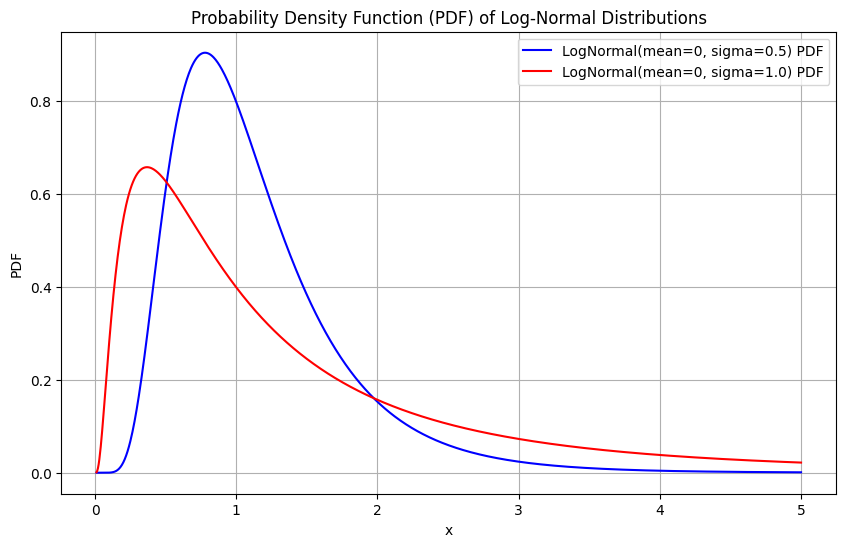

In [4]:
# Plot 1: PDF of Log-Normal Distributions
plot_pdf(x_values, pdf_lognorm_1_scipy, pdf_lognorm_2_scipy,
         label1=f'LogNormal(mean={mean1}, sigma={sigma1}) PDF', 
         label2=f'LogNormal(mean={mean2}, sigma={sigma2}) PDF',
         title='Probability Density Function (PDF) of Log-Normal Distributions')

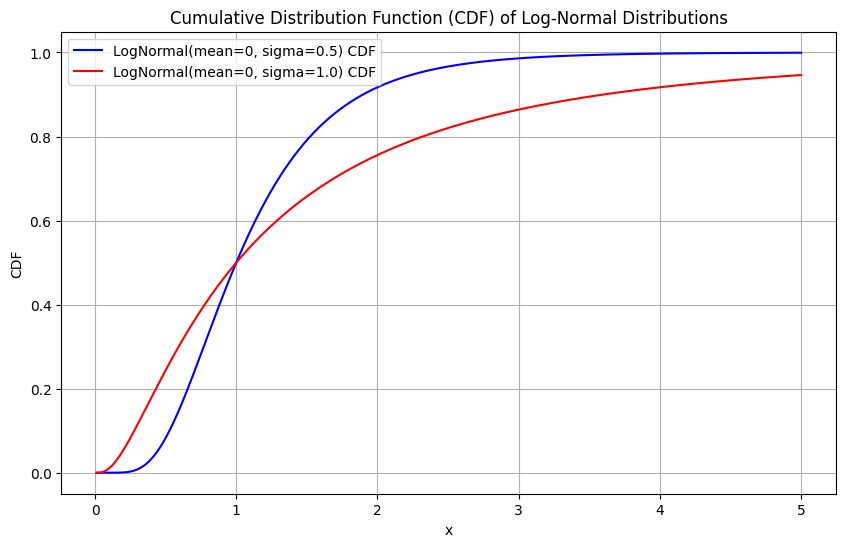

In [5]:
# Plot 2: CDF of Log-Normal Distributions
plot_cdf(x_values, cdf_lognorm_1_scipy, cdf_lognorm_2_scipy, 
         label1=f'LogNormal(mean={mean1}, sigma={sigma1}) CDF', 
         label2=f'LogNormal(mean={mean2}, sigma={sigma2}) CDF', 
         title='Cumulative Distribution Function (CDF) of Log-Normal Distributions')

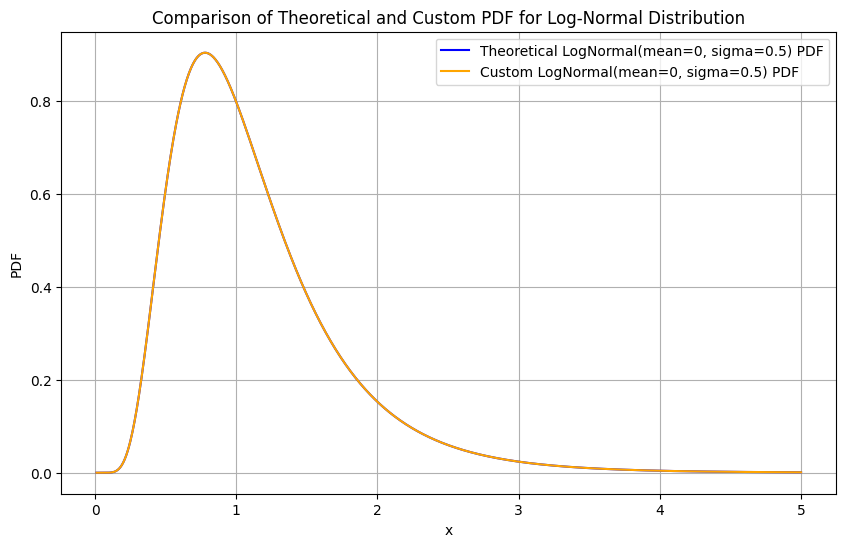

In [6]:
# Plot 3: Comparison of Theoretical and Custom PDFs
plot_comparison(x_values, pdf_lognorm_1_scipy, pdf_lognorm_1_custom, 
                label1=f'Theoretical LogNormal(mean={mean1}, sigma={sigma1}) PDF', 
                label2=f'Custom LogNormal(mean={mean1}, sigma={sigma1}) PDF', 
                title='Comparison of Theoretical and Custom PDF for Log-Normal Distribution')